<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall24-mcw/blob/main/Annotations_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annotations in Seaborn

This is a companion notebook for [Chapter 28, Graphics for Communication](https://byuidatascience.github.io/python4ds/graphics-for-communication.html) from [Python for Data Science](https://byuidatascience.github.io/python4ds/), which itself is a Python port of Grolemund and Wickham's [R for Data Science](https://r4ds.had.co.nz/index.html) book (updated [2nd edition](https://r4ds.hadley.nz/)). *The section headings in this notebook will be numbered to correspond to the sections in Python for Data Science.*

Python for Data Science uses [Altair](https://altair-viz.github.io/index.html), which is a Python library built on top of [Vega-Lite](https://vega.github.io/vega-lite/), so the syntax may look familiar.  The code in this notebook will be based on [Seaborn Objects](https://seaborn.pydata.org/tutorial/objects_interface.html), to be consistent with our class materials.

# 28.1 Introduction
https://byuidatascience.github.io/python4ds/graphics-for-communication.html#introduction-19

In exploratory data analysis, you learned how to use plots as tools for exploration. When you make exploratory plots, you know — even before looking — which variables the plot will display. You made each plot for a purpose, could quickly look at it, and then move on to the next plot. In the course of most analyses, you’ll produce tens or hundreds of plots, most of which are immediately thrown away.

Now that you understand your data, you need to communicate your understanding to others. Your audience will likely not share your background knowledge and will not be deeply invested in the data. To help others quickly build up a good mental model of the data, you will need to *invest considerable effort in making your plots as self-explanatory as possible*.

## 28.1.1 Prerequisites
https://byuidatascience.github.io/python4ds/graphics-for-communication.html#prerequisites-11

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style
import matplotlib as mpl
import matplotlib.pyplot as plt

Load the datasets (mpg, presidential, diamonds)

In [2]:
url1 = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/mpg/mpg.csv"
url2 = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/diamonds/diamonds.csv"
mpg = pd.read_csv(url1)
diamonds = pd.read_csv(url2)

For each categorial attribute, use the Pandas [`Categorical()`](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) function to turn any value not explicitly listed into `np.nan`.

In [3]:
diamonds['cut'] = pd.Categorical(diamonds.cut,
  ordered = True,
  categories =  ["Fair", "Good", "Very Good", "Premium", "Ideal" ])

diamonds['color'] = pd.Categorical(diamonds.color,
  ordered = True,
  categories =  ["D", "E", "F", "G", "H", "I", "J"])

diamonds['clarity'] = pd.Categorical(diamonds.clarity,
  ordered = True,
  categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

# 28.2 Label
https://byuidatascience.github.io/python4ds/graphics-for-communication.html#label

The easiest place to start when turning an exploratory graphic into an expository graphic is with good labels.

The purpose of a plot title is to summarise the main finding. Avoid titles that just describe what the plot is, e.g. “A scatterplot of engine displacement vs. fuel economy”.

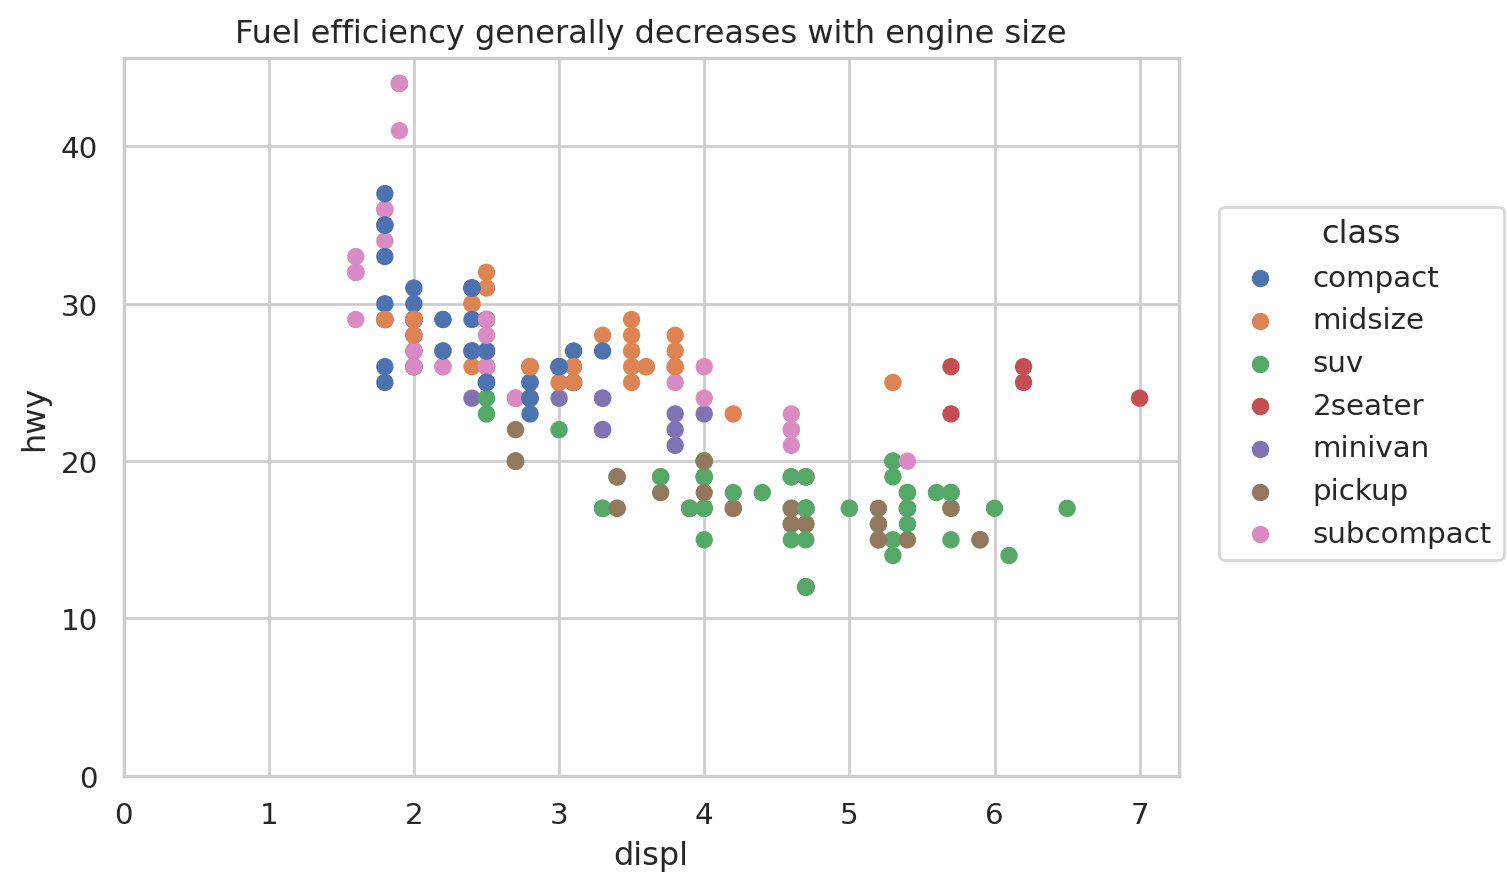

In [4]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .label(title="Fuel efficiency generally decreases with engine size")
  .limit(x=(0,None), y=(0,None))  # start x,y at 0,0
)

If you need to add more text, you can use subtitles. They can add additional detail.

In Seaborn Objects, you can add subtitle on 2nd line (using `\n`), but there's not a ton of customization available.

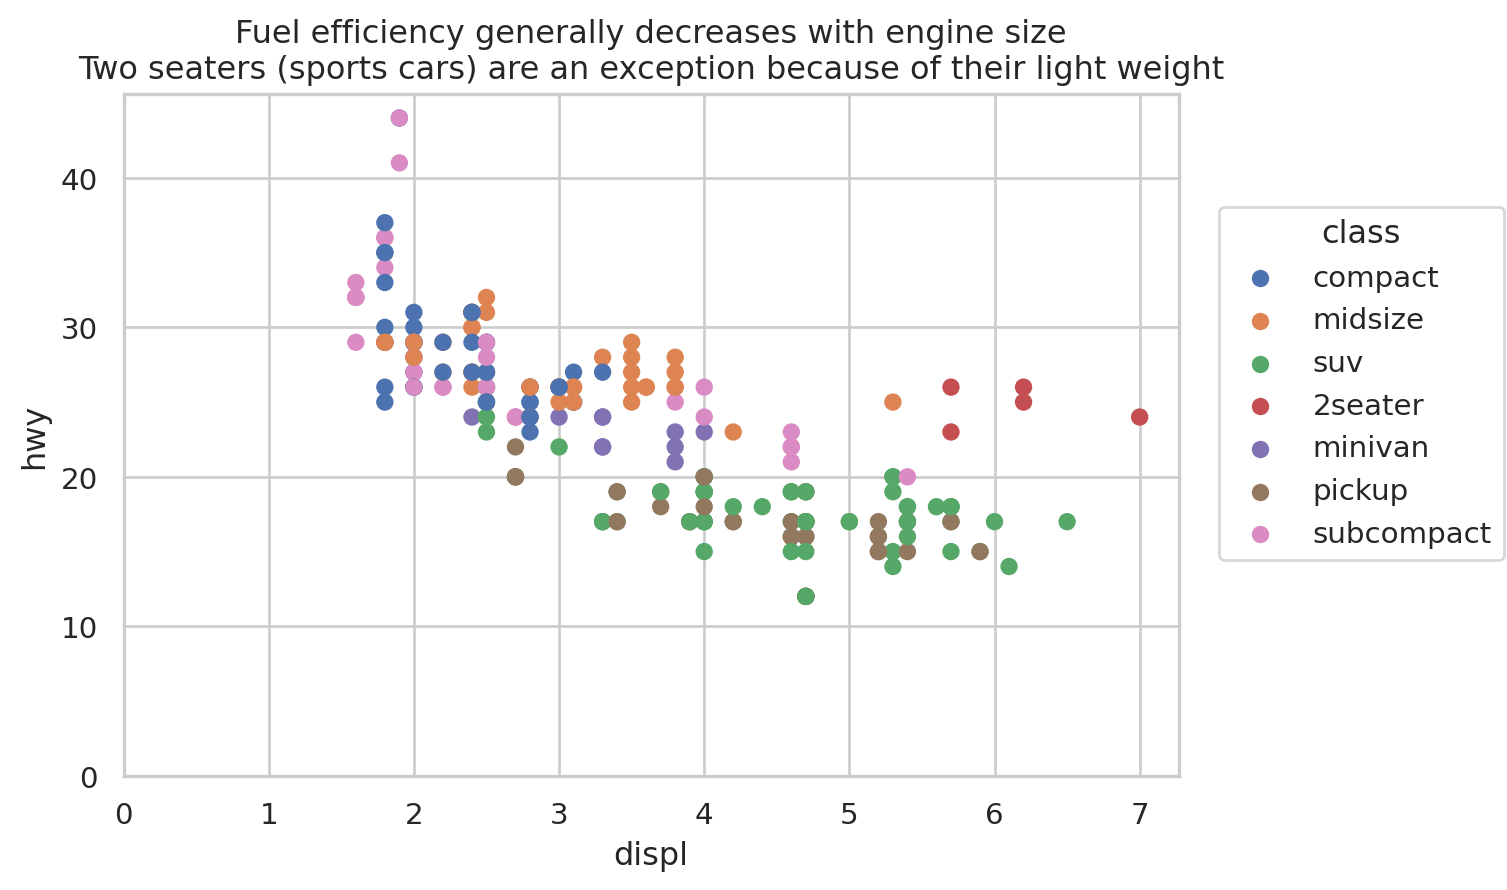

In [5]:
# variables for title and subtitle
title = "Fuel efficiency generally decreases with engine size"
subtitle = "Two seaters (sports cars) are an exception because of their light weight"

(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .label(title=title + "\n" + subtitle)
  .limit(x=(0,None), y=(0,None))  # start x,y at 0,0
)

You can also replace the axis and legend titles. It’s usually a good idea to replace short variable names with more detailed descriptions, and to include the units.

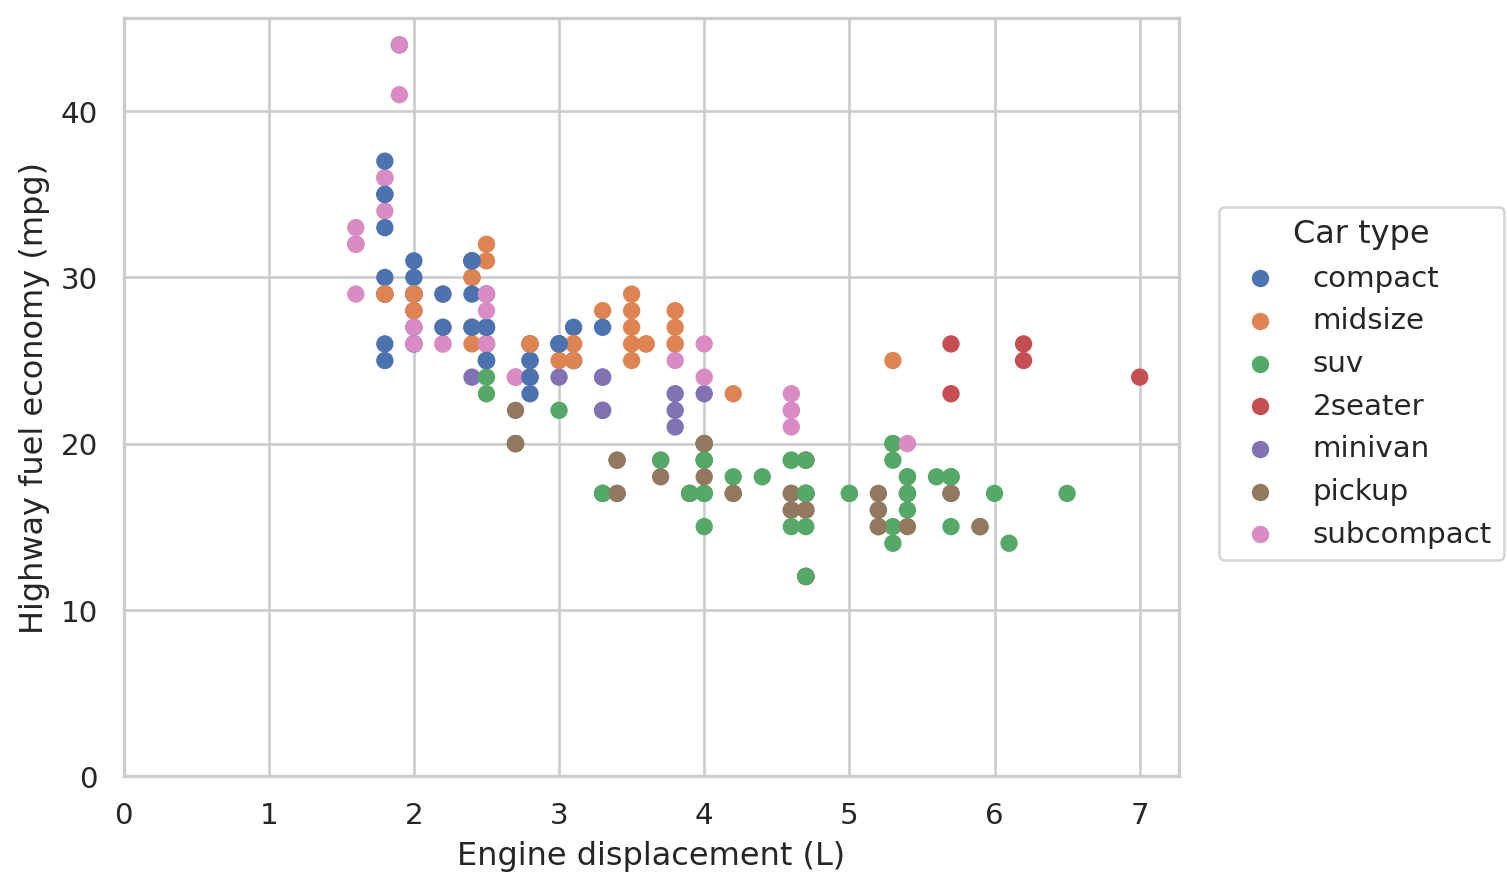

In [6]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .label(x="Engine displacement (L)", y="Highway fuel economy (mpg)",
         color="Car type")
  .limit(x=(0,None), y=(0,None))  # start x,y at 0,0
)

# 28.3 Annotations
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#missing-values-2

In addition to labelling major components of your plot, it’s often useful to label individual observations or groups of observations.

In the next charts, we want to highlight a subset of the vehicles. One way to do that is create a subset dataframe that we can use in our chart.  This code pulls out the vehicles with the highest highway MPG for each class.

In [7]:
best_in_class = (mpg
    .assign(
      hwy_min = lambda x: x.groupby('class').hwy.transform('max'))
    .query('(hwy_min == hwy)')
    .drop_duplicates('class', keep = 'first'))
best_in_class.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,hwy_min
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,26
37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,24
144,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize,32
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,27
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup,22


Can use [`so.Text()`](https://seaborn.pydata.org/generated/seaborn.objects.Text.html) to add labels based on the data

color shorthands (ex: `k` is black) - https://matplotlib.org/stable/users/explain/colors/colors.html  

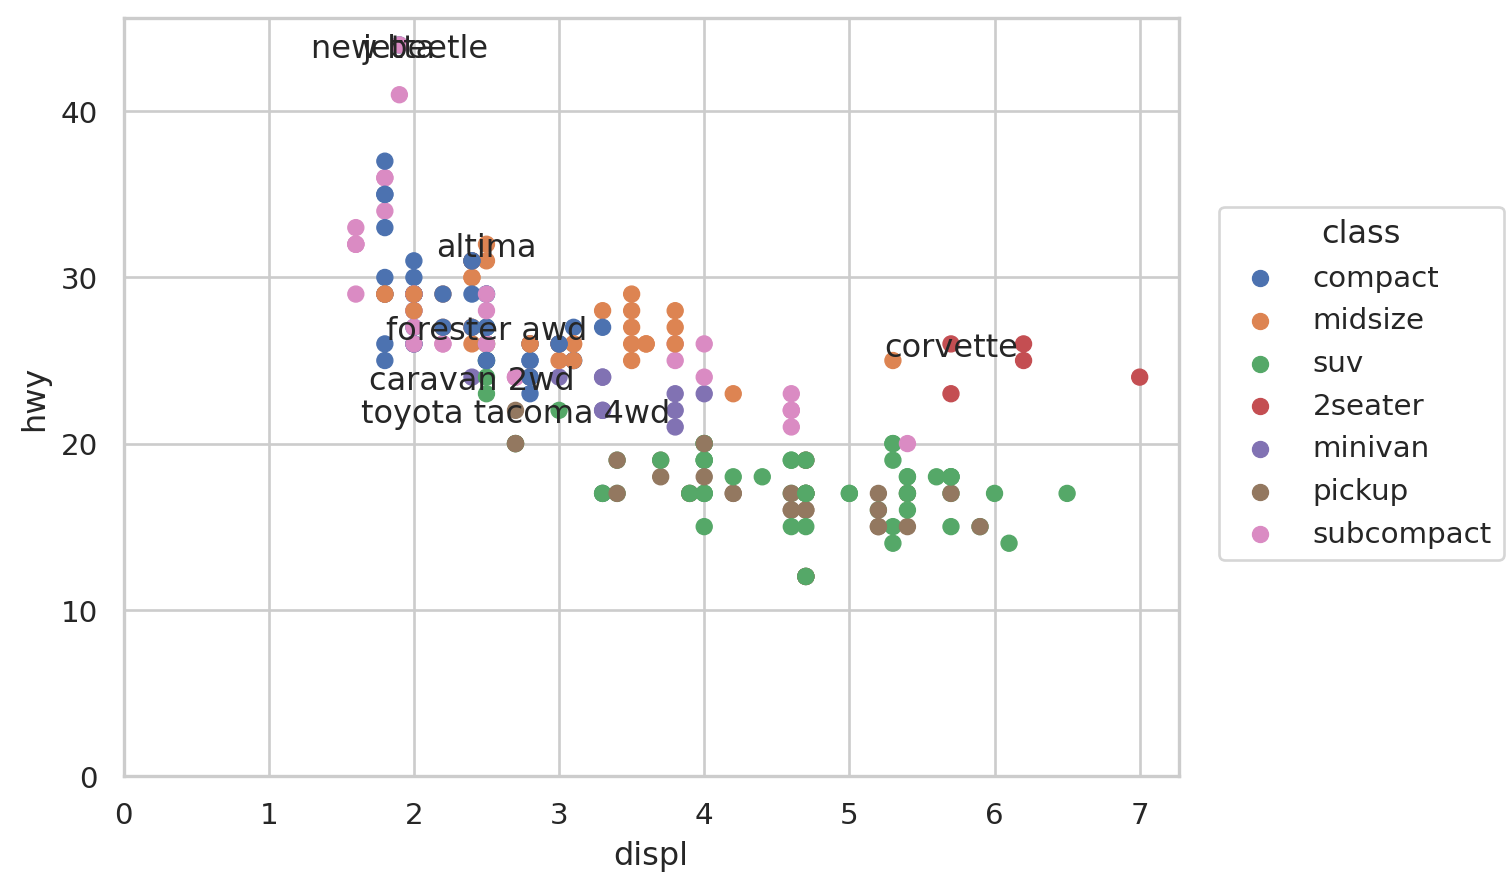

In [8]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .limit(x=(0,None), y=(0,None))  # start x,y at 0,0
  # add text labels to subset of data
  .add(so.Text(color="k"), data=best_in_class, text='model')
)

This is hard to read because the labels overlap with each other, and with the points. We can make things a little better by formatting the text using additional arguments to `so.Text()`. We also add a second layer of large, hollow points to highlight the points that we’ve labeled.

Additional customizations:
* text properties (`halign`, `valign`, `offset`) - https://seaborn.pydata.org/tutorial/properties.html#text-properties  
* `so.Dots()` - https://seaborn.pydata.org/generated/seaborn.objects.Dots.html

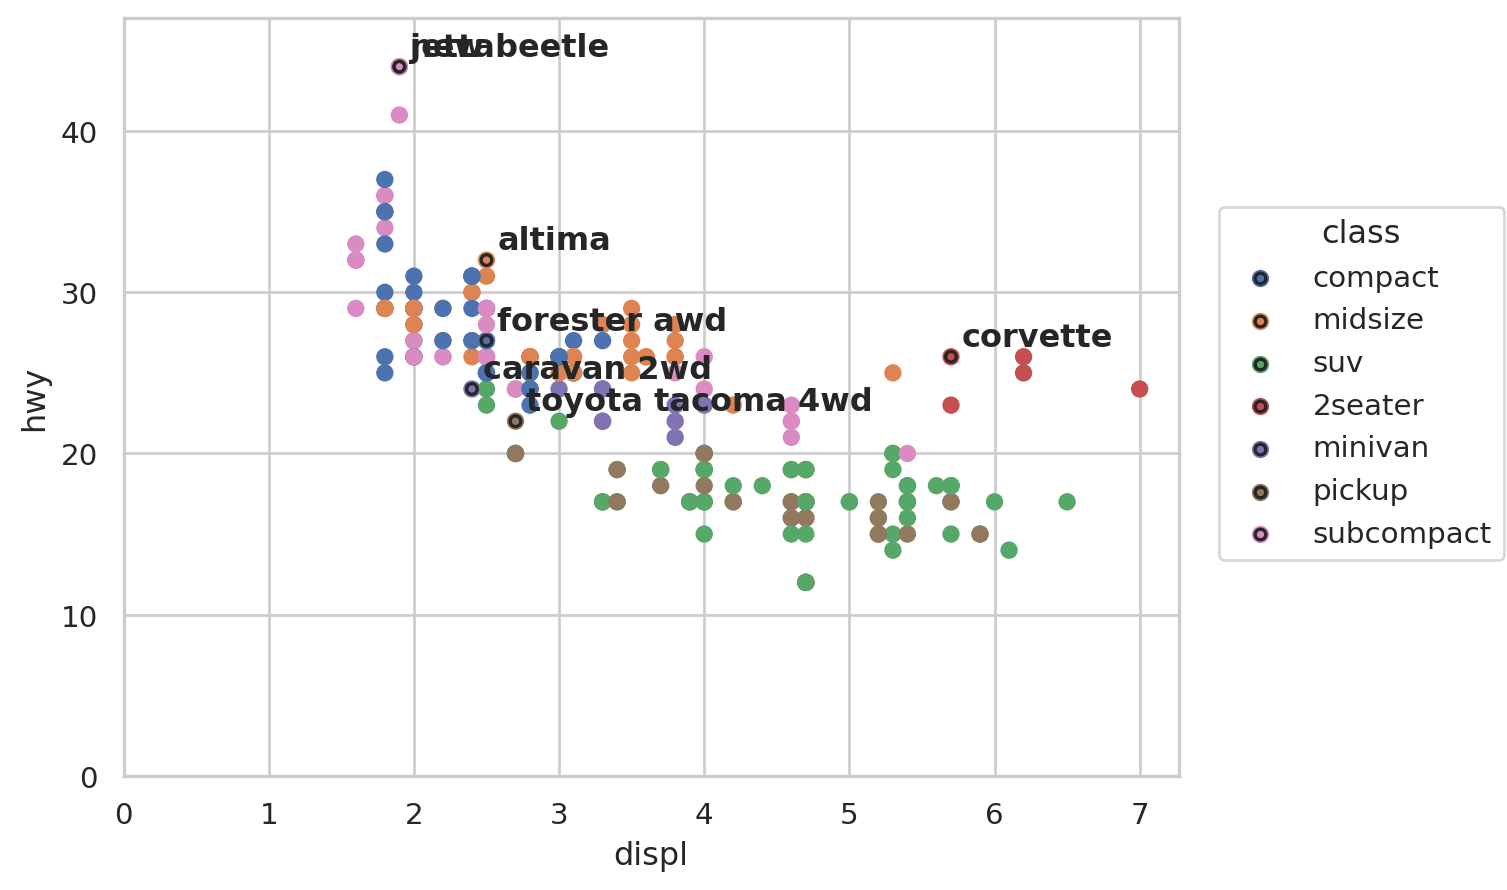

In [9]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .limit(x=(0,None), y=(0,47))  # start x,y at 0,0
  # text customizations
  .add(so.Text({"fontweight": "bold"}, color="k", halign="left",
               offset=4, valign="baseline"),
       data=best_in_class, text='model')
  # add black border around best_in_class dots
  .add(so.Dots(color="k",stroke=1.25,fill=False), data=best_in_class)
)

That helps a bit, but if you look closely in the top-left hand corner, you’ll notice that there are two labels practically on top of each other. This happens because the highway mileage and displacement for the best cars in the compact and subcompact categories are exactly the same. There’s no way that we can fix these by applying the same transformation for every label.

Alternatively, you might just want to add a single label to the plot, but you’ll still need to create a data frame. Often, you want the label in the corner of the plot, so it’s convenient to create a new data frame using the maximum values of x and y.

In [10]:
label = pd.DataFrame({
    'x': [mpg.displ.max()],
    'y': [mpg.hwy.max()],
    'text': ["Increasing engine size is related to decreasing fuel economy."]
    })

label.head()

,x,y,text
0,7.0,44,Increasing engine size is related to decreasin...


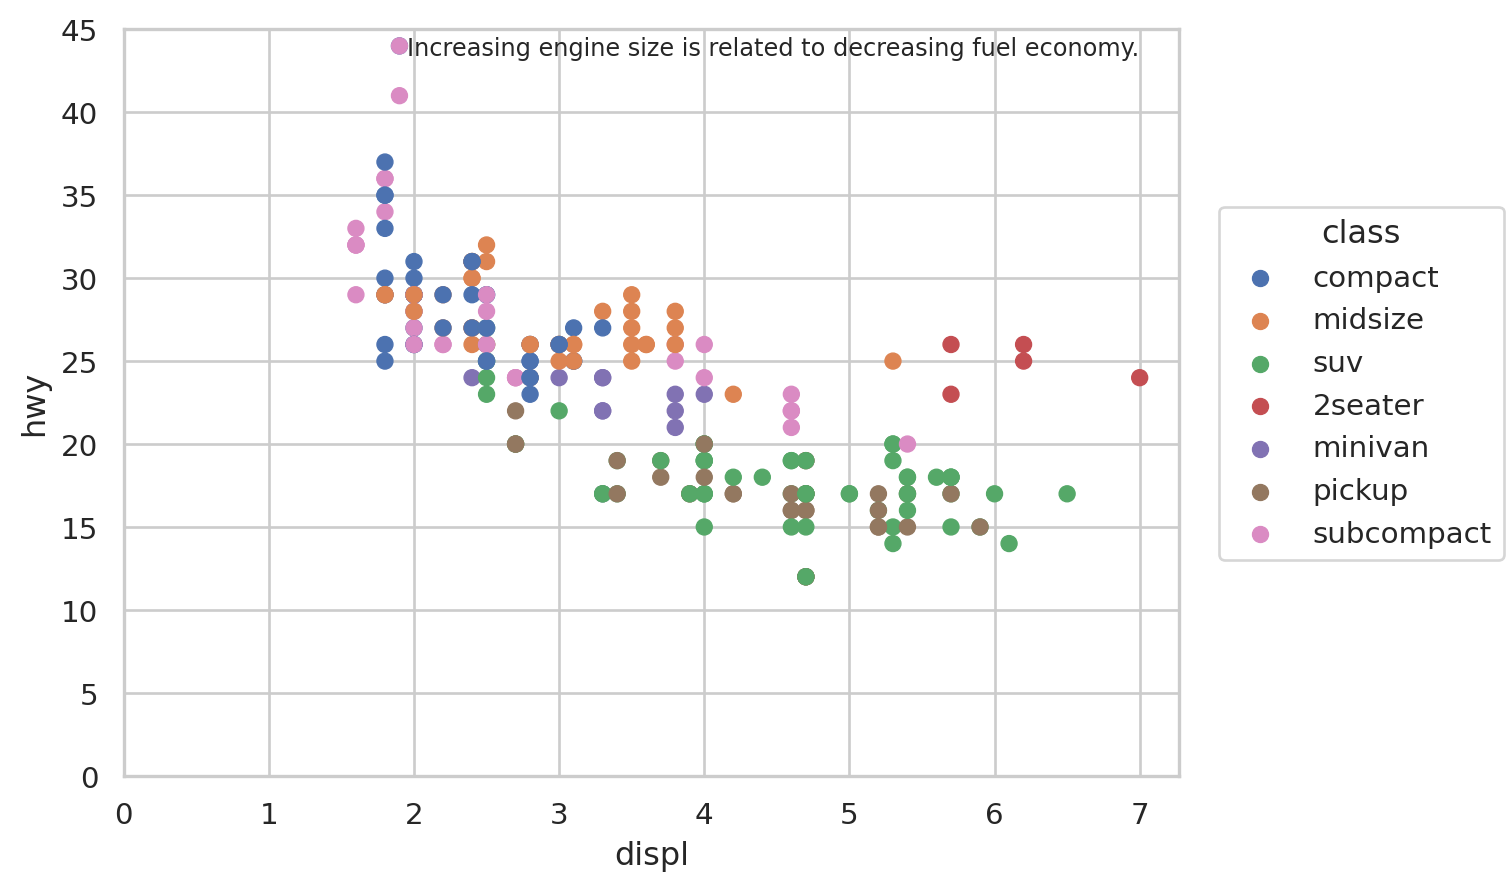

In [11]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .limit(x=(0,None), y=(0,45))  # start x,y at 0,0
  # text customizations
  .add(so.Text(color="k", halign='right', fontsize=9, offset=0),
       data=label, x='x', y='y', text='text')
)

Here's an extra example for placing text at an arbitrary location

In [12]:
text = pd.DataFrame({
    'x': [2],
    'y': [8],
    'text': ["No data in this quadrant\n(low displ, low mpg)"]
    })
text.head()

,x,y,text
0,2,8,"No data in this quadrant\n(low displ, low mpg)"


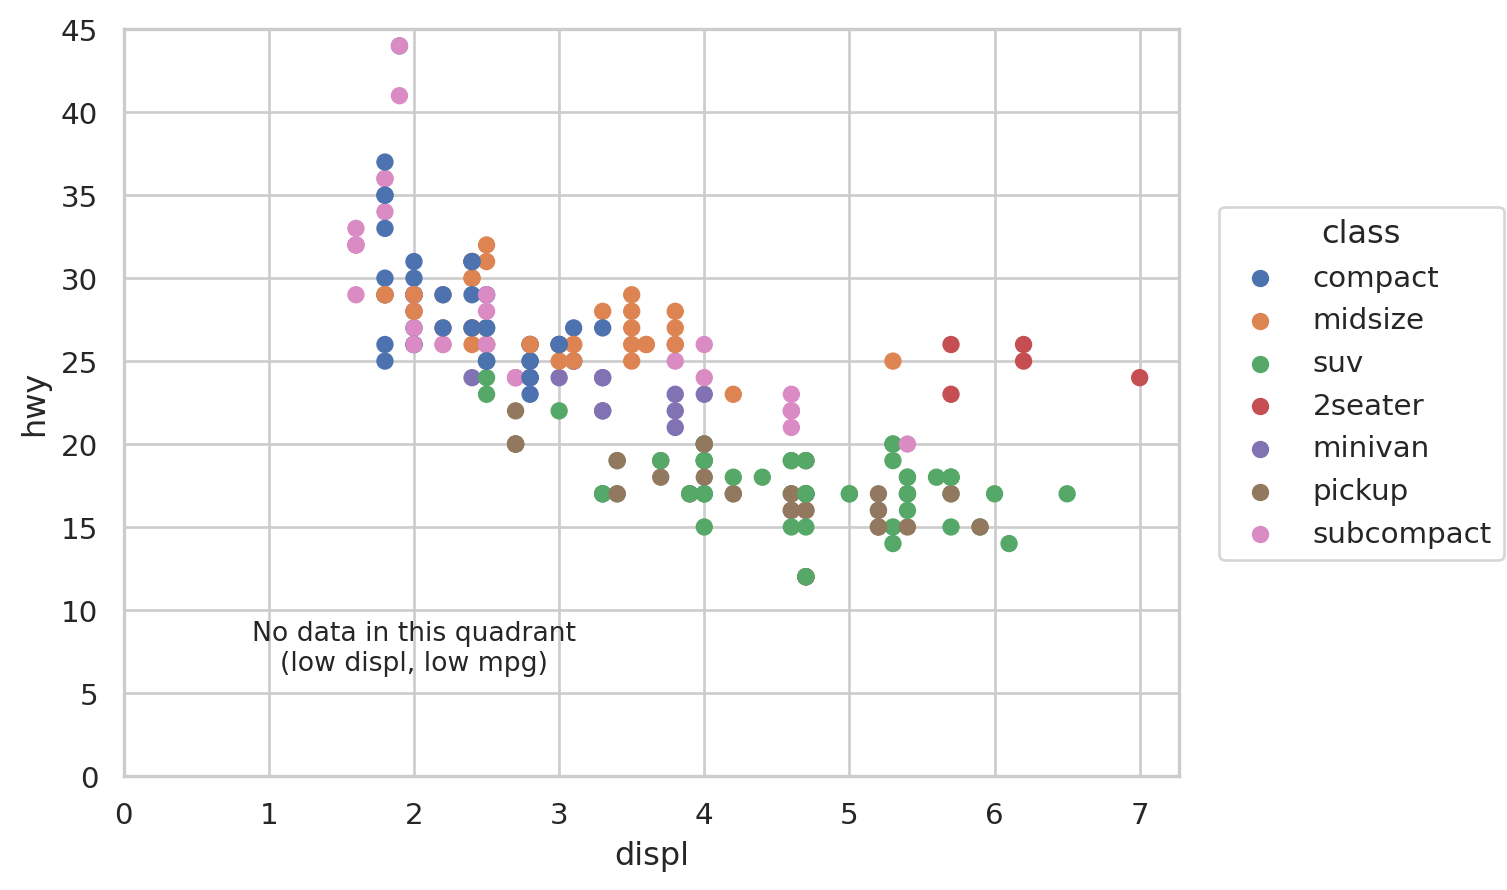

In [13]:
(so.Plot(data=mpg, x='displ', y='hwy', color='class')
  .add(so.Dot())
  .theme({**axes_style("whitegrid")})  # change theme
  .limit(x=(0,None), y=(0,45))  # start x,y at 0,0
  # text customizations
  .add(so.Text(color="k", fontsize=10),
       data=text, x='x', y='y', text='text')
)

# 28.4 Scales
https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html#covariation

## 28.4.1 Axis ticks and legend keys

*Skipping this section because we've already covered this in [Seaborn Objects Customizations](https://github.com/odu-cs625-datavis/public-fall24-mcw/blob/main/Customizations_Seaborn.ipynb)*

## 28.4.2 Legend layout
https://byuidatascience.github.io/python4ds/graphics-for-communication.html#legend-layout

Requires using [`sns.move_legend()`](https://seaborn.pydata.org/generated/seaborn.move_legend.html), so we'll use standard Seaborn. The options available to `move_legend()` are in https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html under "Other parameters: loc".

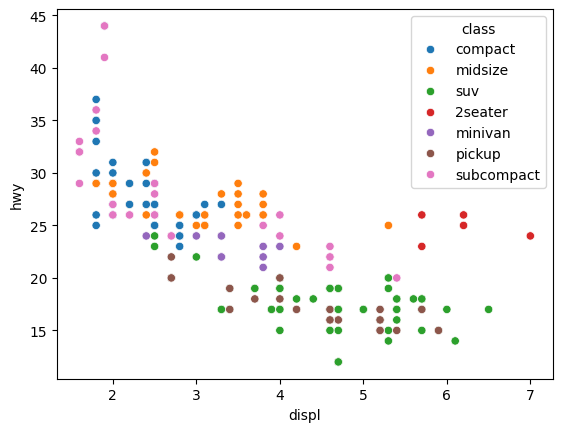

In [14]:
ax = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

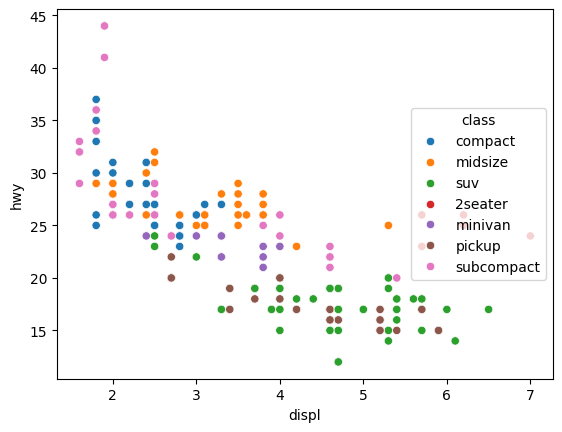

In [15]:
ax = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.move_legend(ax, "center right")
plt.show()

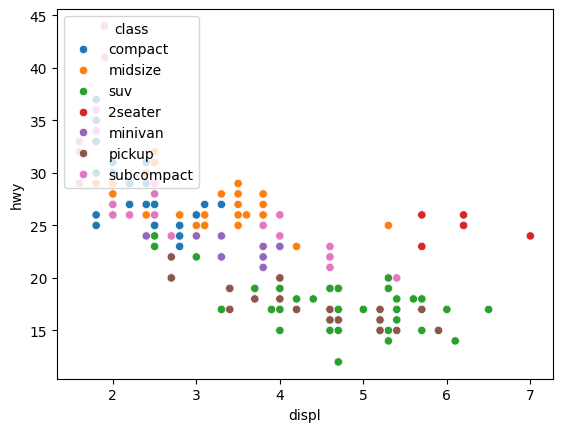

In [16]:
ax = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.move_legend(ax, "upper left")
plt.show()


You can also place the legend at an abitrary location.  From the [Axes.legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html):  
`bbox_to_anchor` - providing a "2-tuple (x, y) places the corner of the legend specified by loc at x, y."

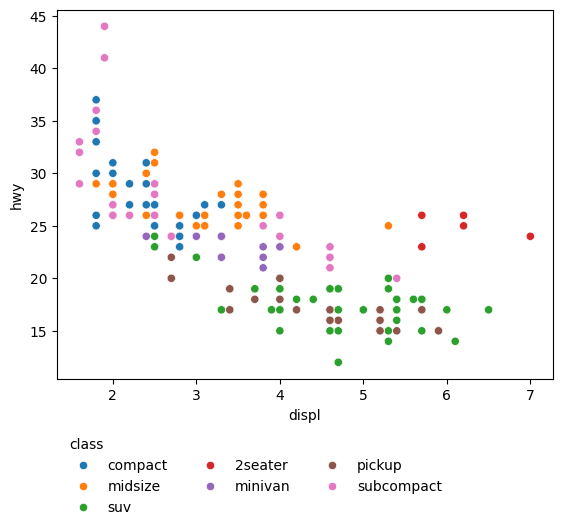

In [17]:
ax = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.4,-0.4),
                ncol=3, frameon=False, alignment='left')
plt.show()

## 28.4.3 Replacing a scale
https://byuidatascience.github.io/python4ds/graphics-for-communication.html#replacing-a-scale

Instead of just tweaking the details a little, you can instead replace the scale altogether. There are two types of scales you’re mostly likely to want to switch out: continuous position scales and colour scales. Fortunately, the same principles apply to all the other aesthetics, so once you’ve mastered position and colour, you’ll be able to quickly pick up other scale replacements.

It’s very useful to plot transformations of your variable. For example, in diamond prices it’s easier to see the precise relationship between `carat` and `price` if we log transform them.

In [18]:
diamonds_log10 = diamonds.assign(
    carat_log = np.log10(diamonds.carat),
    price_log = np.log10(diamonds.price)
)

original data

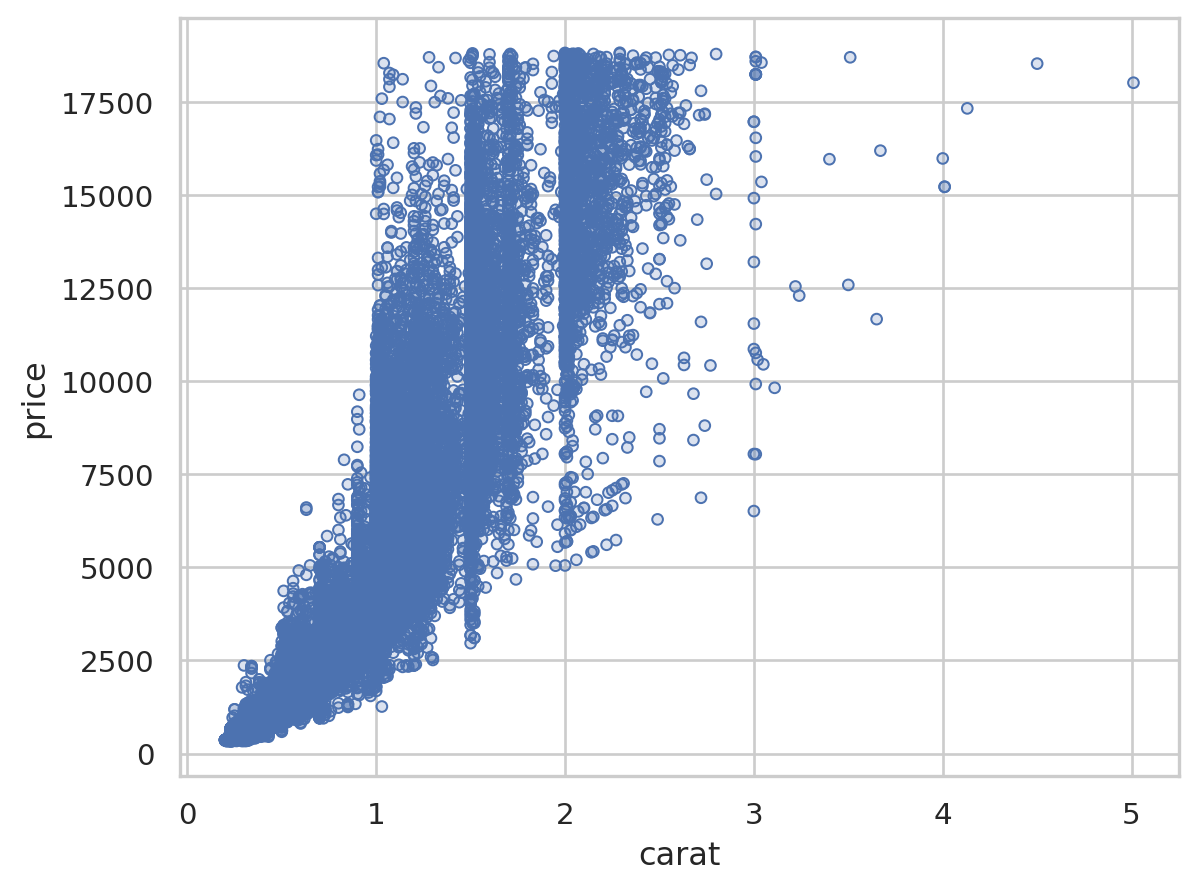

In [19]:
(so.Plot(data=diamonds_log10, x='carat', y='price')
  .add(so.Dots())
  .theme({**axes_style("whitegrid")})  # change theme
)

log-transformed data

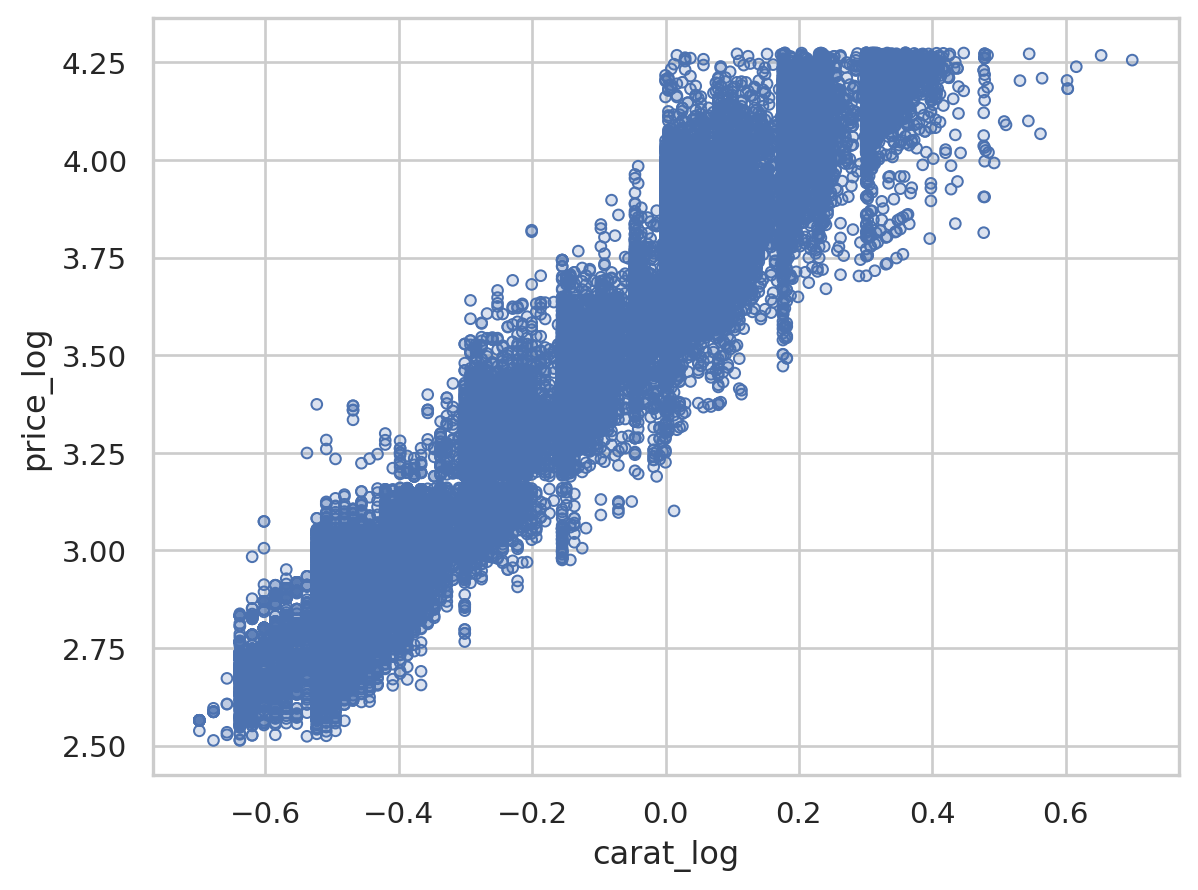

In [20]:
(so.Plot(data=diamonds_log10, x='carat_log', y='price_log')
  .add(so.Dots())
  .theme({**axes_style("whitegrid")})  # change theme
)

However, the disadvantage of this transformation is that the axes are now labelled with the transformed values, making it hard to interpret the plot. Instead of doing the transformation in the aesthetic mapping, we can instead do it with the scale. This is visually identical, except the axes are labelled on the original data scale.

log-transformed chart using original data

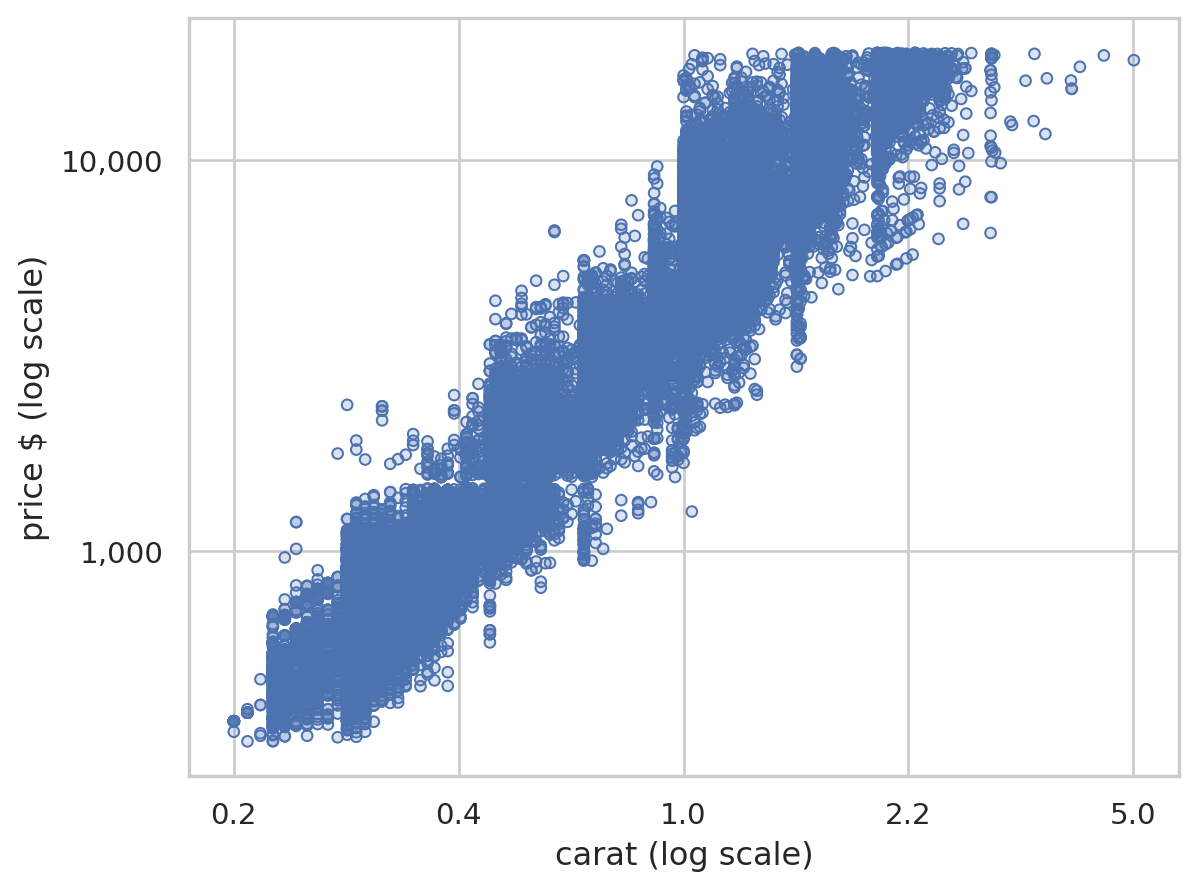

In [21]:
(so.Plot(data=diamonds_log10, x='carat', y='price')
  .add(so.Dots())
  .theme({**axes_style("whitegrid")})  # change theme
  .scale(y=so.Continuous(trans="log").label(like="{x:,.0f}"),
         x=so.Continuous(trans="log").tick(count=5, between=[0.2,5]).label(like="{x:.1f}"))
  .label(x="carat (log scale)", y="price $ (log scale)")
)


*Skipping the rest of this section because we've already covered this in [Seaborn Objects Customizations](https://github.com/odu-cs625-datavis/public-fall24-mcw/blob/main/Customizations_Seaborn.ipynb)*